# ML with SKLearn
Author: Zuhayr Ali<br>
November 7, 2022

### 1. Read the Auto data

In [1]:
import pandas as pd
df = pd.read_csv('Auto.csv')

print(df.head())
print('\n')
print("dimensions:", df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


dimensions: (392, 9)


### 2. Data exploration with code

In [2]:
print(df.mpg.describe())     # range = (9, 46.6), average = 23.445918
print('\n')
print(df.weight.describe())  # range = (1613, 5140), average = 2977.584184
print('\n')
print(df.year.describe())    # range = (70, 82), average = 76.010256

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64


count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


### 3. Explore data types

In [3]:
print(df.dtypes)
print('\n')

df.cylinders = pd.Categorical(df.cylinders.astype("category").cat.codes)
df['origin'] = pd.Categorical(df.origin)

print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


### 4. Deal with NAs

In [4]:
df = df.dropna()
print("dimensions:", df.shape)

dimensions: (389, 9)


### 5. Modify columns

In [5]:
import numpy as np

df['mpg_high'] = np.where(df.mpg > df.mpg.mean(), 1, 0)
df = df.drop(['mpg', 'name'], axis=1)
print(df.head())

  cylinders  displacement  horsepower  weight  acceleration  year origin  \
0         4         307.0         130    3504          12.0  70.0      1   
1         4         350.0         165    3693          11.5  70.0      1   
2         4         318.0         150    3436          11.0  70.0      1   
3         4         304.0         150    3433          12.0  70.0      1   
6         4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


### 6. Data exploration with graphs

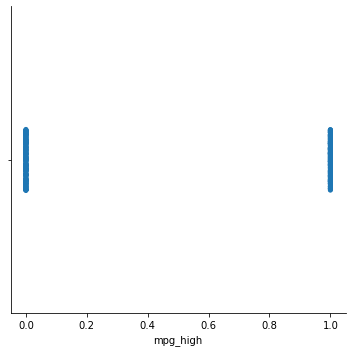

In [6]:
import seaborn as sns

mpg_cat = sns.catplot(x='mpg_high', data=df) # I learned nothing I didn't already know fom making this column.

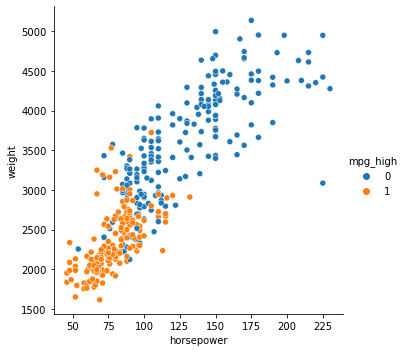

In [7]:
df_rel = sns.relplot(x='horsepower', y='weight', data=df, hue='mpg_high') # Smaller and less powerful cars are more fuel efficient than larger and higher power cars.

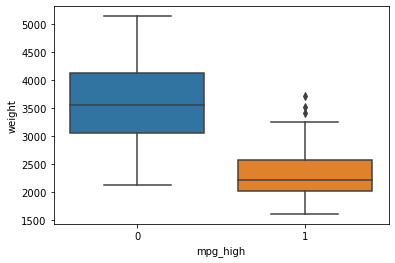

In [8]:
df_box = sns.boxplot(x='mpg_high', y='weight', data=df) # Further reinforces that smaller cars are more fuel efficient, also informs that 

### 7. Train/test split

In [9]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


### 8. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver='lbfgs')
log_clf.fit(X_train, y_train)
print('score:', log_clf.score(X_train, y_train))

log_pred = log_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, log_pred))

score: 0.9067524115755627
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



### 9. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print('score:', dt_clf.score(X_train, y_train))

dt_pred = dt_clf.predict(X_test)

print(classification_report(y_test, dt_pred))

score: 1.0
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.80      0.86      0.83        28

    accuracy                           0.87        78
   macro avg       0.86      0.87      0.86        78
weighted avg       0.87      0.87      0.87        78



### 10. Neural Network

In [12]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
nn_clf.fit(X_train_scaled, y_train)

nn_pred = nn_clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_test, nn_pred))

accuracy =  0.8717948717948718
